In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/viettech-compensation/VietTech compensation data.xlsx


In [2]:
!pip install openpyxl 
import seaborn as sns
import datetime

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,8)})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 5.9 MB/s eta 0:00:00


In [3]:
sns.set(rc={'figure.figsize':(20,8)})

In [4]:
xl_file = pd.ExcelFile('/kaggle/input/viettech-compensation/VietTech compensation data.xlsx')
print(xl_file.sheet_names)
df = xl_file.parse(xl_file.sheet_names[0])

['Sheet1']


# Main objective(s) of this analysis
* Know about the compensation in tech industry
* Segment companies by compensation
* Find the highest income one

# Describing the dataset
Data is a table of **compensation in tech industry** from anonymous source.

In order to get more information about this dataset, let's dig into it!


In [5]:
n_rows = df.shape[0]
print('Number of rows: ' + str(n_rows))

Number of rows: 297


In [6]:
# See the first five columns in dataset
df.head(5)

,Company Name,Title,Focus,Level,Year,Year of Experiences,Country,City,Arrangement,Salary format,...,Currency,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD
0,Tiki,Software Engineer,API Development (Back-end),Junior,2021.0,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,...,USD,0.0,NaN,0.0,0.0,NaN,13200.0,13200.0,1.0,13200.0
1,Zalo,Software Engineer,API Development (Back-end),Entry,2021.0,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Annually,...,USD,0.0,NaN,0.0,0.0,NaN,12000.0,12000.0,1.0,12000.0
2,"Main Line Health Inc,",Data Analyst,Data,Entry,2019.0,0-1 YOE,United States,Radnor,In Office,Annually,...,USD,0.0,0.0,500.0,0.0,Maximum 5% merit-based salary increase if annu...,65000.0,65500.0,1.0,65500.0
3,Bnp paribas,Software Engineer,Full Stack,Senior,2022.0,5-10 YOE,France,Paris,Hybrid,Annually,...,USD,0.0,NaN,0.0,0.0,NaN,140000.0,140000.0,1.0,140000.0
4,Snap,Software Engineer,Distributed Systems (Back-end),Entry,2022.0,0-1 YOE,United States,Mountain View,Fully Remote,Annually,...,USD,0.0,NaN,0.0,0.0,NaN,133000.0,133000.0,1.0,133000.0


In [7]:
# Expore statistical values of numberic columns
df.describe()

,Year,Base Salary,Annual Salary,TC,USD Rate,TC in USD
count,297.000000,2.970000e+02,2.970000e+02,2.970000e+02,297.000000,297.000000
mean,2021.134680,1.099255e+07,1.314734e+08,1.416303e+08,0.621212,74382.148148
std,1.315979,2.090194e+07,2.510693e+08,2.697254e+08,0.471548,87138.618648
min,2012.000000,2.500000e+01,4.800000e+03,4.800000e+03,0.000043,1235.000000
25%,2021.000000,7.000000e+03,5.400000e+04,6.000000e+04,0.000043,13800.000000
50%,2022.000000,1.290000e+05,1.300000e+05,1.785020e+05,1.000000,36028.000000
75%,2022.000000,1.800000e+07,2.160000e+08,2.280000e+08,1.000000,110000.000000
max,2023.000000,1.900000e+08,2.280000e+09,2.299000e+09,1.209900,555500.000000


In [8]:
# list all the columns
print('Number of columns: ' + str(len(list(df.columns.values))))
list(df.columns.values)

Number of columns: 21


['Company Name',
 'Title',
 'Focus',
 'Level',
 'Year',
 'Year of Experiences',
 'Country',
 'City',
 'Arrangement',
 'Salary format',
 'Base Salary',
 'Currency',
 'Stock ($/yr)',
 'Sign-on bonus',
 'Annual Bonus',
 'Commission Details',
 'Other Details',
 'Annual Salary',
 'TC',
 'USD Rate',
 'TC in USD']

In [9]:
df = df.drop('Year', axis=1)

# Analysis each columns

In [10]:
import matplotlib.pyplot as plt

In [11]:
def analysis_categorial_col(col_name):
    value_unique = df[col_name].value_counts()
    n_value_unique = value_unique.shape[0]
    print('Number distinct values: ' + str(n_value_unique))
    print('Number duplicated values:' + str(n_rows - n_value_unique))
    print(value_unique)
    
    if (n_value_unique >= 15):
        top_10_val_unique_count = value_unique[:10]
        bot_10_val_unique_count = value_unique[-10:]

        fig, axs = plt.subplots(nrows=2)
        sns.barplot(x=col_name, y="Freq.", data=pd.DataFrame({col_name: top_10_val_unique_count.index, 'Freq.':top_10_val_unique_count.values}), ax=axs[0])
        sns.barplot(x=col_name, y="Freq.", data=pd.DataFrame({col_name: bot_10_val_unique_count.index, 'Freq.':bot_10_val_unique_count.values}), ax=axs[1])
    else:
        sns.barplot(x=col_name, y="Freq.", data=pd.DataFrame({col_name: value_unique.index, 'Freq.':value_unique.values}))

Number distinct values: 222
Number duplicated values:75
Tiki                9
FPT Software        8
Grab                8
Google              7
Microsoft           7
                   ..
Viettel Networks    1
VieON               1
Visa Inc            1
fpt                 1
Vingroup            1
Name: Company Name, Length: 222, dtype: int64


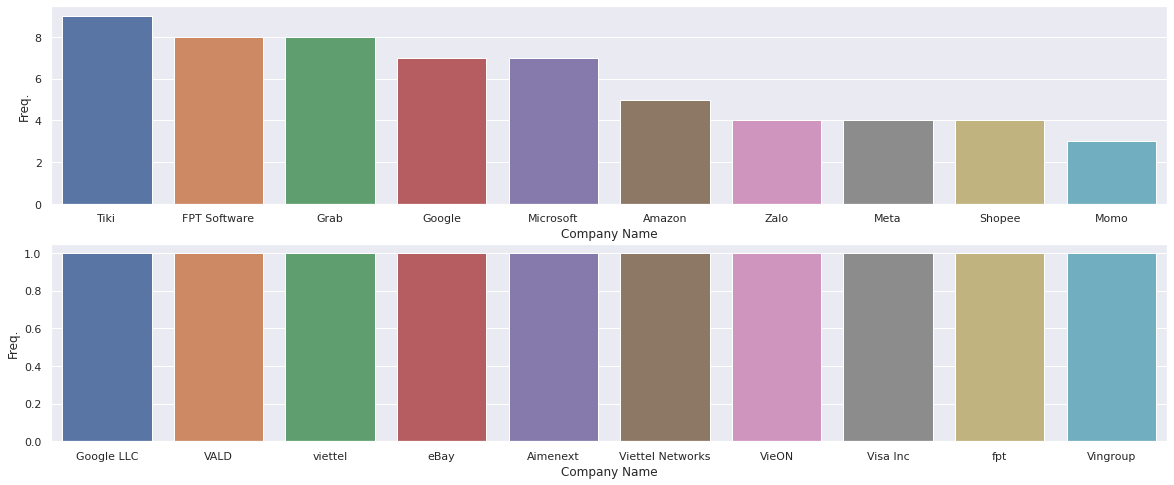

In [12]:
analysis_categorial_col('Company Name')

Number distinct values: 49
Number duplicated values:248
Software Engineer                                                                       186
Data Scientist                                                                           18
Data Engineer                                                                            17
Data Analyst                                                                             10
Product Manager                                                                           7
AI Engineer                                                                               6
Business Analyst                                                                          5
Research Scientist                                                                        3
Machine Learning Researcher                                                               2
Business Intelligence Analyst                                                             2
ML Engineer             

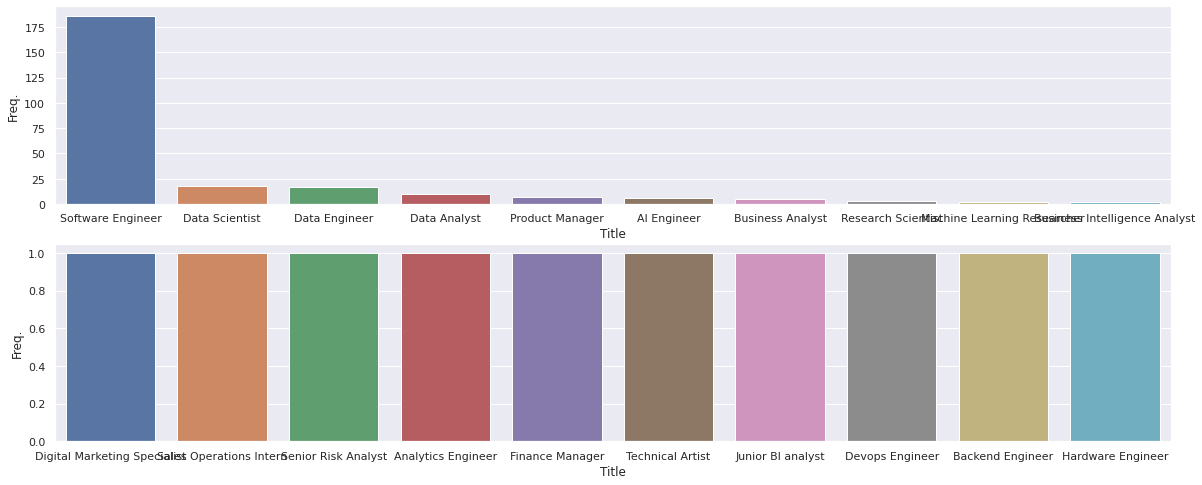

In [13]:
analysis_categorial_col('Title')

Number distinct values: 38
Number duplicated values:259
API Development (Back-end)        59
ML / AI                           46
Full Stack                        43
Data                              41
Distributed Systems (Back-end)    26
Mobile (iOS + Android)            23
Web Development (Front-end)       16
DevOps                             8
Testing (SDET)                     3
Production                         3
Embedded                           2
Tech Education                     1
Banking, consulting                1
Security                           1
Blockchain                         1
Strategy                           1
Game development                   1
Infra                              1
Bioinformatics                     1
Power train                        1
Data Platform                      1
ML product analytics               1
Automation                         1
Applied Research                   1
fintech                            1
Early Career Progra

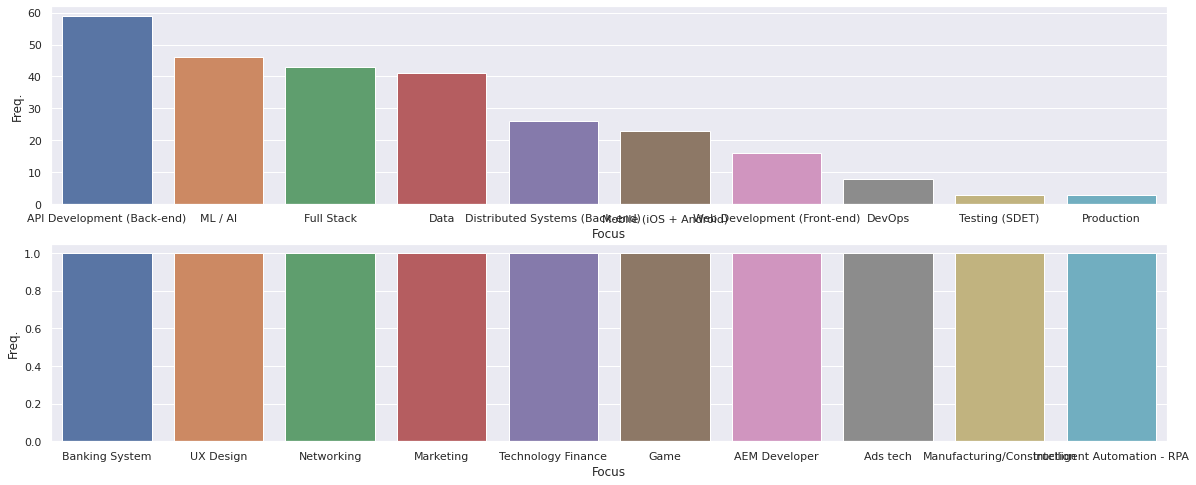

In [14]:
analysis_categorial_col('Focus')

Number distinct values: 11
Number duplicated values:286
Mid-level          91
Entry              68
Junior             67
Senior             51
Staff               7
Intern              7
Staff+              2
new graduate        1
Internship          1
Manager             1
Entry to Junior     1
Name: Level, dtype: int64


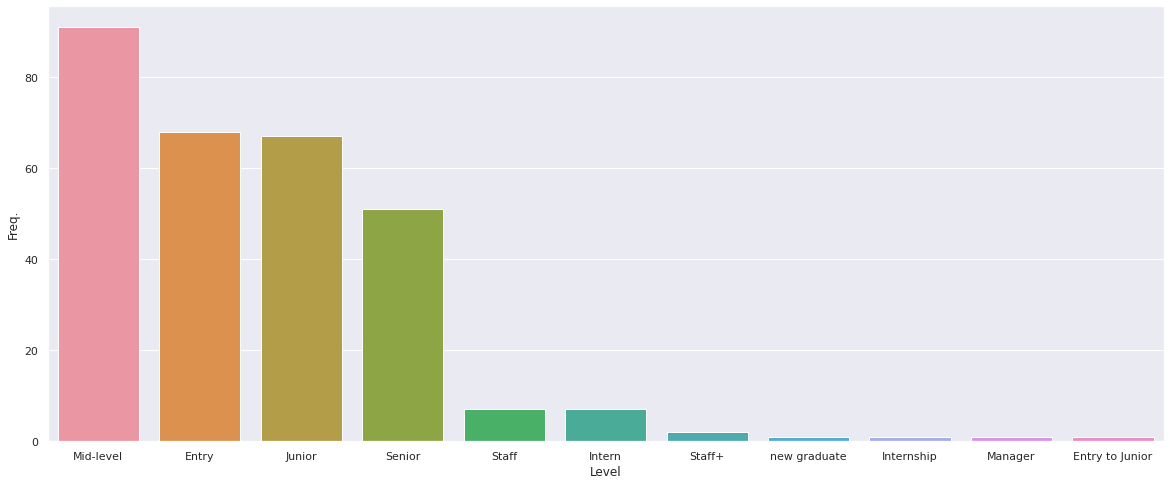

In [15]:
analysis_categorial_col('Level')

In [16]:
df['Year of Experiences'].unique()
i = df[df['Year of Experiences'] == '0-1'].index
df = df.drop(i)
i = df[df['Year of Experiences'] == datetime.datetime(2022, 1, 3, 0, 0)].index
df = df.drop(i)
df['Year of Experiences'].unique()

array(['0-1 YOE', '5-10 YOE', '1-3 YOE', '3-5 YOE', '10-20 YOE'],
      dtype=object)

Number distinct values: 5
Number duplicated values:292
0-1 YOE      106
1-3 YOE       97
3-5 YOE       50
5-10 YOE      36
10-20 YOE      6
Name: Year of Experiences, dtype: int64


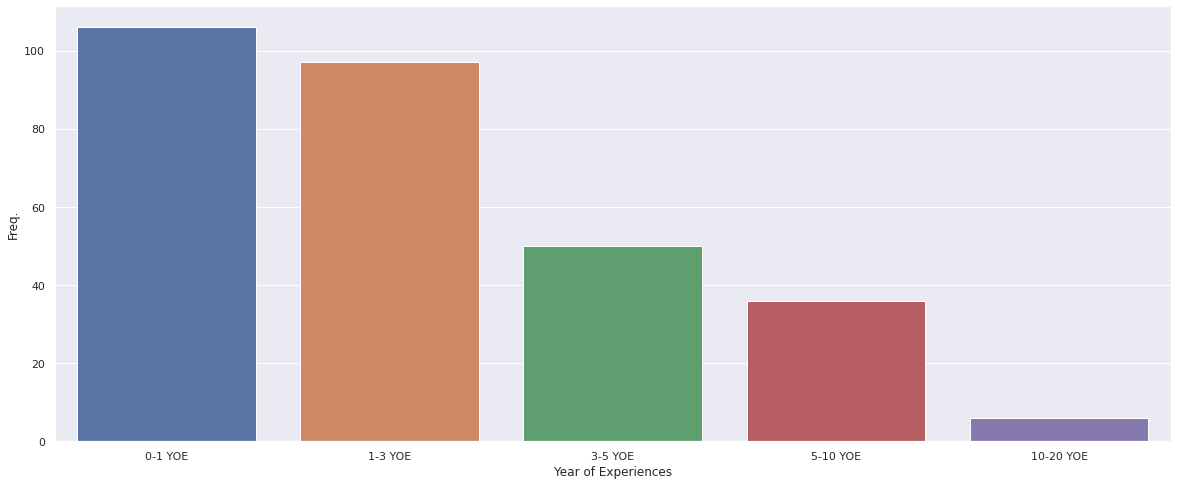

In [17]:
analysis_categorial_col('Year of Experiences')

In [18]:
df.loc[df['Year of Experiences'] == '0-1 YOE', 'Year of Experiences Encoding'] = 0
df.loc[df['Year of Experiences'] == '1-3 YOE', 'Year of Experiences Encoding'] = 1
df.loc[df['Year of Experiences'] == '3-5 YOE', 'Year of Experiences Encoding'] = 3
df.loc[df['Year of Experiences'] == '5-10 YOE', 'Year of Experiences Encoding'] = 5
df.loc[df['Year of Experiences'] == '10-20 YOE', 'Year of Experiences Encoding'] = 10

Number distinct values: 13
Number duplicated values:284
Vietnam           166
United States      83
Singapore          15
Canada              9
Australia           5
United Kingdom      4
France              3
Finland             3
Netherlands         2
Japan               2
Taiwan              1
Denmark             1
Germany             1
Name: Country, dtype: int64


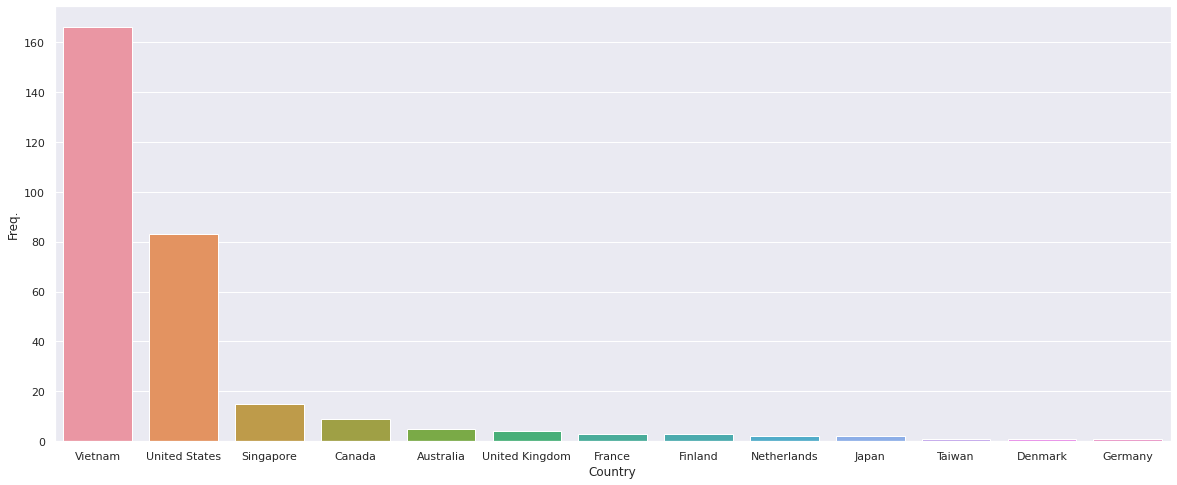

In [19]:
analysis_categorial_col('Country')

Number distinct values: 59
Number duplicated values:238
Ho Chi Minh             104
Ha Noi                   57
Singapore                15
Greater Seattle Area     15
SF bay area              11
New York Metro Area      10
Da Nang                   5
Atlanta                   5
Houston                   4
London                    4
Toronto                   3
Dallas                    3
Paris                     3
Boston                    3
Ottawa                    2
Helsinki                  2
Austin                    2
Tokyo                     2
San Jose                  2
Melbourne                 2
Mountain View             2
Amsterdam                 2
Cincinnati                1
Ohio                      1
Brisbane                  1
Copenhagen                1
Tampere                   1
Sydney                    1
Texas                     1
Madison                   1
Remote                    1
Ha Tinh                   1
Syracuse                  1
Calgary             

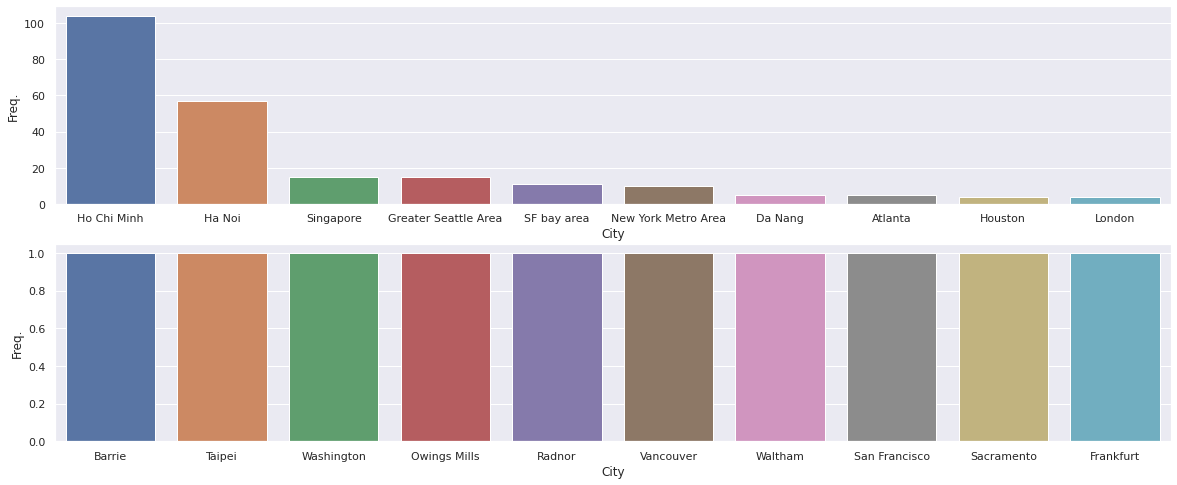

In [20]:
analysis_categorial_col('City')

Number distinct values: 3
Number duplicated values:294
In Office       125
Hybrid          107
Fully Remote     63
Name: Arrangement, dtype: int64


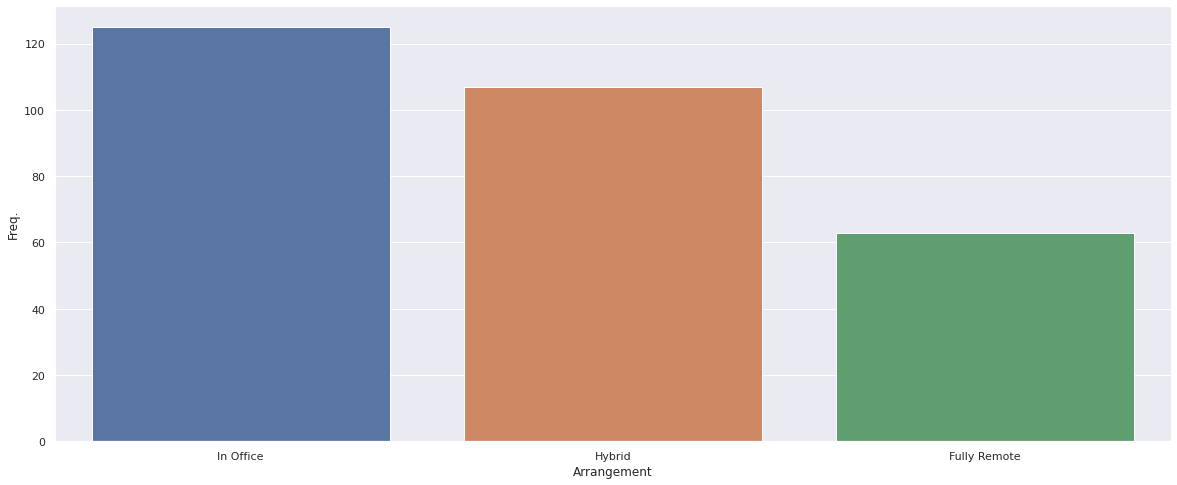

In [21]:
analysis_categorial_col('Arrangement')

Number distinct values: 6
Number duplicated values:291
Monthly        177
Annually       111
Hourly           4
CAD 27/hour      1
Daily            1
Bi-weekly        1
Name: Salary format, dtype: int64


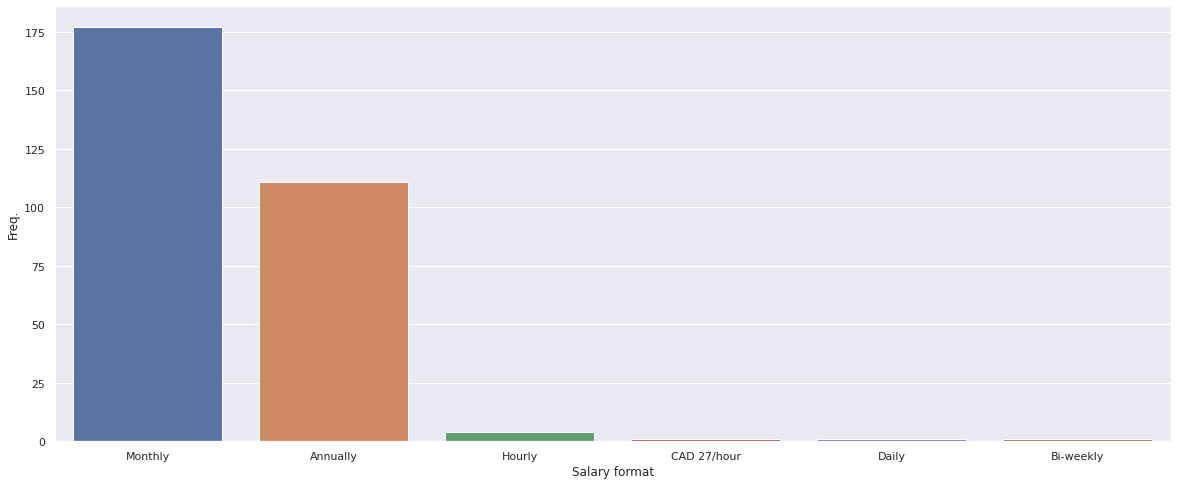

In [22]:
analysis_categorial_col('Salary format')

Number distinct values: 9
Number duplicated values:288
USD    163
VND    102
SGD     14
CAD      5
EUR      4
AUD      3
JPY      2
DKK      1
GBP      1
Name: Currency, dtype: int64


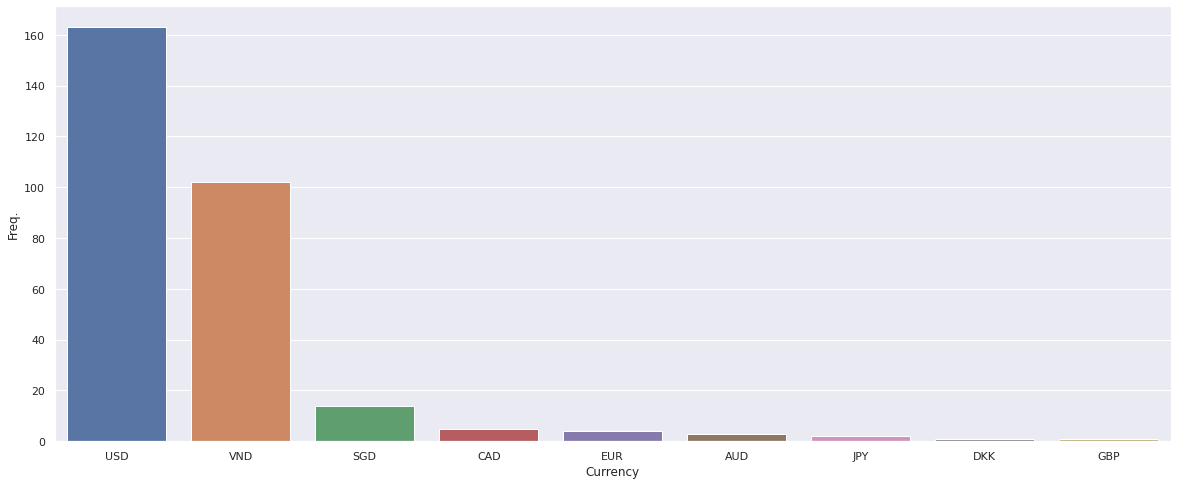

In [23]:
analysis_categorial_col('Currency')

In [24]:
df['TC in USD'].describe()

count       295.000000
mean      74741.040678
std       87323.816785
min        1235.000000
25%       13762.500000
50%       36028.000000
75%      110898.000000
max      555500.000000
Name: TC in USD, dtype: float64

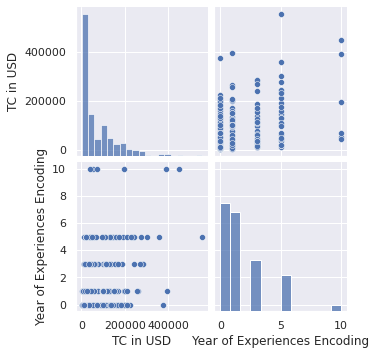

In [25]:
sns.pairplot(df[['TC in USD','Year of Experiences Encoding']])

## Remote

count        63.000000
mean     107045.968254
std       84208.978879
min        3088.000000
25%       42450.500000
50%       99000.000000
75%      137250.000000
max      447500.000000
Name: TC in USD, dtype: float64


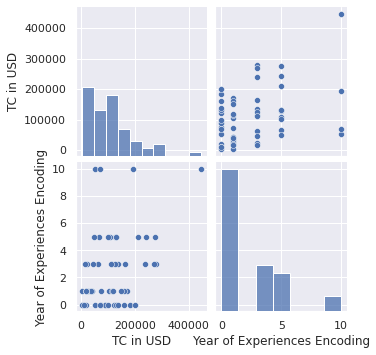

In [26]:
df_fr = df[df['Arrangement'] == 'Fully Remote']
print(df_fr['TC in USD'].describe())
sns.pairplot(df_fr[['TC in USD','Year of Experiences Encoding']])

In [27]:
df_fr.loc[df_fr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
120,Affirm,Software Engineer,API Development (Back-end),Staff+,10-20 YOE,United States,SF bay area,Fully Remote,Annually,240000.0,...,200000.0,30000.0,0.0,0.0,100% covered healthcare for family. About $10k...,240000.0,447500.0,1.000000,447500.0,10.0
19,Zillow,Software Engineer,Mobile (iOS + Android),Mid-level,3-5 YOE,United States,Longview,Fully Remote,Annually,220000.0,...,60000.0,"$140,000 / 2 years",0.0,0.0,NaN,220000.0,280000.0,1.000000,280000.0,3.0
206,Coinbase,Software Engineer,Distributed Systems (Back-end),Senior,5-10 YOE,Singapore,Singapore,Fully Remote,Annually,185500.0,...,181000.0,0.0,18550.0,0.0,Coinbase has same compensation for everyone in...,185500.0,385050.0,0.716641,275942.0,5.0
111,Amazon,Software Engineer,Distributed Systems (Back-end),Mid-level,3-5 YOE,United States,New York Metro Area,Fully Remote,Annually,179000.0,...,50000.0,165000.0,0.0,0.0,Banana,179000.0,270250.0,1.000000,270250.0,3.0
24,DoorDash,Finance Manager,Technology Finance,Senior,5-10 YOE,United States,New York Metro Area,Fully Remote,Annually,190000.0,...,50000.0,10000.0,0.0,0.0,NaN,190000.0,242500.0,1.000000,242500.0,5.0
92,A Heathcare AI,ML Engineer,ML / AI,Staff,3-5 YOE,United States,New York Metro Area,Fully Remote,Annually,240000.0,...,0.0,NaN,0.0,0.0,NaN,240000.0,240000.0,1.000000,240000.0,3.0
160,Wealthfront,Software Engineer,API Development (Back-end),Mid-level,5-10 YOE,United States,SF bay area,Fully Remote,Annually,135000.0,...,67500.0,5000.0,7009.0,0.0,NaN,135000.0,210759.0,1.000000,210759.0,5.0
118,Robinhood,Software Engineer,Mobile (iOS + Android),Entry,0-1 YOE,United States,Greater Seattle Area,Fully Remote,Annually,135000.0,...,44000.0,30000.0,13500.0,0.0,NaN,135000.0,200000.0,1.000000,200000.0,0.0
17,Booking.com,Software Engineer,Mobile (iOS + Android),Senior,10-20 YOE,Netherlands,Amsterdam,Fully Remote,Annually,115000.0,...,45000.0,0.0,35000.0,0.0,NaN,115000.0,195000.0,1.000000,195000.0,10.0
20,Grab,Software Engineer,Ads tech,Entry,0-1 YOE,United States,Greater Seattle Area,Fully Remote,Annually,133200.0,...,30000.0,NaN,20000.0,0.0,NaN,133200.0,183200.0,1.000000,183200.0,0.0


# Checking Vietnam

In [28]:
df_vn = df.loc[df['Country'] == 'Vietnam']

## Remote in Vietnam

count       18.000000
mean     28481.222222
std      20384.858145
min       3088.000000
25%      16058.500000
50%      20700.000000
75%      43500.000000
max      70000.000000
Name: TC in USD, dtype: float64


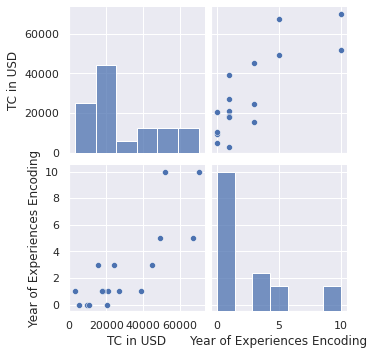

In [29]:
df_vn_fr = df_vn[df_vn['Arrangement'] == 'Fully Remote']
print(df_vn_fr['TC in USD'].describe())
sns.pairplot(df_vn_fr[['TC in USD','Year of Experiences Encoding']])

In [30]:
df_vn_fr.loc[df_vn_fr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
213,WQ,Software Engineer,Data,Senior,10-20 YOE,Vietnam,Ha Noi,Fully Remote,Annually,70000.0,...,0.0,NaN,0.0,0.0,NaN,7.000000e+04,7.000000e+04,1.000000,70000.0,10.0
245,Employment Hero,Software Engineer,Full Stack,Staff,5-10 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,5600.0,...,0.0,0.0,0.0,0.0,NaN,6.720000e+04,6.720000e+04,1.000000,67200.0,5.0
37,University of Oslo,Software Engineer,API Development (Back-end),Senior,10-20 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,4300.0,...,0.0,NaN,0.0,0.0,NaN,5.160000e+04,5.160000e+04,1.000000,51600.0,10.0
286,EPAM Anywhere,Software Engineer,DevOps,Senior,5-10 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,88000000.0,...,NaN,0.0,88000000.0,0.0,NaN,1.056000e+09,1.144000e+09,0.000043,49067.0,5.0
265,A Singapore Startup,Software Engineer,Full Stack,Mid-level,3-5 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,3750.0,...,NaN,NaN,NaN,NaN,NaN,4.500000e+04,4.500000e+04,1.000000,45000.0,3.0
189,Inspectorio,Software Engineer,API Development (Back-end),Senior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,3000.0,...,0.0,NaN,3000.0,0.0,NaN,3.600000e+04,3.900000e+04,1.000000,39000.0,1.0
188,Epam,Software Engineer,API Development (Back-end),Mid-level,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,2200.0,...,0.0,1900.0,0.0,0.0,NaN,2.640000e+04,2.687500e+04,1.000000,26875.0,1.0
141,Tiki,Software Engineer,Web Development (Front-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,44000000.0,...,0.0,NaN,40000000.0,0.0,NaN,5.280000e+08,5.680000e+08,0.000043,24362.0,3.0
41,Inspectorio,Software Engineer,API Development (Back-end),Mid-level,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,1500.0,...,0.0,0.0,3000.0,0.0,NaN,1.800000e+04,2.100000e+04,1.000000,21000.0,1.0
31,Tiki,Software Engineer,Distributed Systems (Back-end),Mid-level,0-1 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,1700.0,...,0.0,NaN,0.0,0.0,No sign on bonus,2.040000e+04,2.040000e+04,1.000000,20400.0,0.0


=> WQ is the leading company in compensation

In [31]:
df_vn_fr_sr = df_vn_fr[df_vn_fr['Level'] == 'Senior']
df_vn_fr_sr.loc[df_vn_fr_sr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
213,WQ,Software Engineer,Data,Senior,10-20 YOE,Vietnam,Ha Noi,Fully Remote,Annually,70000.0,...,0.0,NaN,0.0,0.0,NaN,7.000000e+04,7.000000e+04,1.000000,70000.0,10.0
37,University of Oslo,Software Engineer,API Development (Back-end),Senior,10-20 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,4300.0,...,0.0,NaN,0.0,0.0,NaN,5.160000e+04,5.160000e+04,1.000000,51600.0,10.0
286,EPAM Anywhere,Software Engineer,DevOps,Senior,5-10 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,88000000.0,...,NaN,0.0,88000000.0,0.0,NaN,1.056000e+09,1.144000e+09,0.000043,49067.0,5.0
189,Inspectorio,Software Engineer,API Development (Back-end),Senior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,3000.0,...,0.0,NaN,3000.0,0.0,NaN,3.600000e+04,3.900000e+04,1.000000,39000.0,1.0
141,Tiki,Software Engineer,Web Development (Front-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,44000000.0,...,0.0,NaN,40000000.0,0.0,NaN,5.280000e+08,5.680000e+08,0.000043,24362.0,3.0
74,Knorex vietnam,Software Engineer,Full Stack,Senior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,1400.0,...,0.0,500.0,1400.0,0.0,NaN,1.680000e+04,1.832500e+04,1.000000,18325.0,1.0


In [32]:
df_vn_fr_sr = df_vn_fr[df_vn_fr['Level'] == 'Senior']
df_vn_fr_sr.loc[df_vn_fr_sr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
213,WQ,Software Engineer,Data,Senior,10-20 YOE,Vietnam,Ha Noi,Fully Remote,Annually,70000.0,...,0.0,NaN,0.0,0.0,NaN,7.000000e+04,7.000000e+04,1.000000,70000.0,10.0
37,University of Oslo,Software Engineer,API Development (Back-end),Senior,10-20 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,4300.0,...,0.0,NaN,0.0,0.0,NaN,5.160000e+04,5.160000e+04,1.000000,51600.0,10.0
286,EPAM Anywhere,Software Engineer,DevOps,Senior,5-10 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,88000000.0,...,NaN,0.0,88000000.0,0.0,NaN,1.056000e+09,1.144000e+09,0.000043,49067.0,5.0
189,Inspectorio,Software Engineer,API Development (Back-end),Senior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,3000.0,...,0.0,NaN,3000.0,0.0,NaN,3.600000e+04,3.900000e+04,1.000000,39000.0,1.0
141,Tiki,Software Engineer,Web Development (Front-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,44000000.0,...,0.0,NaN,40000000.0,0.0,NaN,5.280000e+08,5.680000e+08,0.000043,24362.0,3.0
74,Knorex vietnam,Software Engineer,Full Stack,Senior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,1400.0,...,0.0,500.0,1400.0,0.0,NaN,1.680000e+04,1.832500e+04,1.000000,18325.0,1.0


In [33]:
df_vn_fr_md = df_vn_fr[df_vn_fr['Level'] == 'Mid-level']
df_vn_fr_md.loc[df_vn_fr_md['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
265,A Singapore Startup,Software Engineer,Full Stack,Mid-level,3-5 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,3750.0,...,NaN,NaN,NaN,NaN,NaN,45000.0,45000.0,1.000000,45000.0,3.0
188,Epam,Software Engineer,API Development (Back-end),Mid-level,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,2200.0,...,0.0,1900.0,0.0,0.0,NaN,26400.0,26875.0,1.000000,26875.0,1.0
41,Inspectorio,Software Engineer,API Development (Back-end),Mid-level,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,1500.0,...,0.0,0.0,3000.0,0.0,NaN,18000.0,21000.0,1.000000,21000.0,1.0
31,Tiki,Software Engineer,Distributed Systems (Back-end),Mid-level,0-1 YOE,Vietnam,Ha Noi,Fully Remote,Monthly,1700.0,...,0.0,NaN,0.0,0.0,No sign on bonus,20400.0,20400.0,1.000000,20400.0,0.0
25,Hodfords,Software Engineer,Distributed Systems (Back-end),Mid-level,1-3 YOE,Vietnam,Da Nang,Fully Remote,Monthly,1500.0,...,0.0,NaN,0.0,0.0,NaN,18000.0,18000.0,1.000000,18000.0,1.0
181,Undigital,Software Engineer,API Development (Back-end),Mid-level,3-5 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,30000000.0,...,0.0,NaN,0.0,0.0,NaN,360000000.0,360000000.0,0.000043,15441.0,3.0


In [34]:
df_vn_fr_jr = df_vn_fr[df_vn_fr['Level'] == 'Junior']
df_vn_fr_jr.loc[df_vn_fr_jr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
229,Employment Hero,Software Engineer,API Development (Back-end),Junior,1-3 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,34800000.0,...,0.0,0.0,0.0,0.0,0.0,417600000.0,417600000.0,0.000043,17911.0,1.0
138,Coderpush,Software Engineer,Web Development (Front-end),Junior,0-1 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,18600000.0,...,0.0,NaN,25000000.0,0.0,NaN,223200000.0,248200000.0,0.000043,10646.0,0.0
57,Athena Studio,Software Engineer,API Development (Back-end),Junior,0-1 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,800.0,...,0.0,0.0,0.0,0.0,NaN,9600.0,9600.0,1.000000,9600.0,0.0


In [35]:
df_vn_fr_et = df_vn_fr[df_vn_fr['Level'] == 'Entry']
df_vn_fr_et.loc[df_vn_fr_et['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
128,Logix Technology Vietnam,Software Engineer,Full Stack,Entry,0-1 YOE,Vietnam,Ho Chi Minh,Fully Remote,Monthly,10000000.0,...,0.0,NaN,0.0,0.0,NaN,120000000.0,120000000.0,0.000043,5147.0,0.0


=> very few juniors and freshers do remote jobs

## In Office & Hybrid Vietnam

In [36]:
df_vn_ih = df_vn[df_vn['Arrangement'] != 'Fully Remote']

count      148.000000
mean     19258.986486
std      15150.241049
min       1235.000000
25%      10294.000000
50%      14400.000000
75%      22517.500000
max      98606.000000
Name: TC in USD, dtype: float64


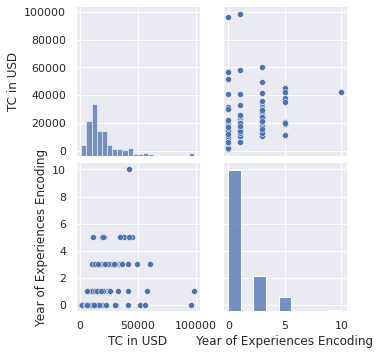

In [37]:
print(df_vn_ih['TC in USD'].describe())
sns.pairplot(df_vn_ih[['TC in USD','Year of Experiences Encoding']])

In [38]:
df_vn_ih.loc[df_vn_ih['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
234,Vantix,Software Engineer,Full Stack,Mid-level,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,190000000.0,...,NaN,NaN,19000000.0,NaN,NaN,2.280000e+09,2.299000e+09,0.000043,98606.0,1.0
129,Tapuniverse,Software Engineer,Mobile (iOS + Android),Mid-level,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,500.0,...,50000.0,0.0,40000.0,0.0,none,6.000000e+03,9.600000e+04,1.000000,96000.0,0.0
222,Picket Homes,Data Scientist,ML / AI,Mid-level,3-5 YOE,Vietnam,Ha Noi,Hybrid,Monthly,5000.0,...,0.0,NaN,NaN,NaN,"ESOP: 4,000 shares; 4-year vesting with 1-year...",6.000000e+04,6.000000e+04,1.000000,60000.0,3.0
228,National Australia Bank,Software Engineer,Mobile (iOS + Android),Senior,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,90000000.0,...,NaN,NaN,270000000.0,NaN,NaN,1.080000e+09,1.350000e+09,0.000043,57903.0,1.0
148,Anduin,Software Engineer,Full Stack,Junior,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,4700.0,...,0.0,NaN,0.0,0.0,NaN,5.640000e+04,5.640000e+04,1.000000,56400.0,0.0
101,VinAI,Research Scientist,ML / AI,Mid-level,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,100000000.0,...,0.0,0.0,0.0,0.0,NaN,1.200000e+09,1.200000e+09,0.000043,51469.0,0.0
221,Grab,Software Engineer,Distributed Systems (Back-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,3300.0,...,3000.0,3000.0,6000.0,NaN,VND4M/month on Grab services,3.960000e+04,4.935000e+04,1.000000,49350.0,3.0
220,Techcombank,Data Engineer,Data,Senior,5-10 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,3000.0,...,0.0,NaN,9000.0,0.0,NaN,3.600000e+04,4.500000e+04,1.000000,45000.0,5.0
88,Tiki Corp,Product Manager,Product Management,Senior,5-10 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,74000000.0,...,400.0,NaN,120000000.0,0.0,NaN,8.880000e+08,1.008000e+09,0.000043,43234.0,5.0
64,One Mount Group,Software Engineer,Distributed Systems (Back-end),Senior,5-10 YOE,Vietnam,Ha Noi,In Office,Monthly,2500.0,...,0.0,NaN,12600.0,0.0,Negotiated 4 months bonus in end of year,3.000000e+04,4.260000e+04,1.000000,42600.0,5.0


In [39]:
print(df_vn_ih['TC in USD'].describe())

count      148.000000
mean     19258.986486
std      15150.241049
min       1235.000000
25%      10294.000000
50%      14400.000000
75%      22517.500000
max      98606.000000
Name: TC in USD, dtype: float64


In [40]:
df_vn_ih_sr = df_vn_ih[df_vn_ih['Level'] == 'Senior']
df_vn_ih_sr.loc[df_vn_ih_sr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
228,National Australia Bank,Software Engineer,Mobile (iOS + Android),Senior,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,90000000.0,...,NaN,NaN,270000000.0,NaN,NaN,1.080000e+09,1.350000e+09,0.000043,57903.0,1.0
221,Grab,Software Engineer,Distributed Systems (Back-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,3300.0,...,3000.0,3000.0,6000.0,NaN,VND4M/month on Grab services,3.960000e+04,4.935000e+04,1.000000,49350.0,3.0
220,Techcombank,Data Engineer,Data,Senior,5-10 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,3000.0,...,0.0,NaN,9000.0,0.0,NaN,3.600000e+04,4.500000e+04,1.000000,45000.0,5.0
88,Tiki Corp,Product Manager,Product Management,Senior,5-10 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,74000000.0,...,400.0,NaN,120000000.0,0.0,NaN,8.880000e+08,1.008000e+09,0.000043,43234.0,5.0
64,One Mount Group,Software Engineer,Distributed Systems (Back-end),Senior,5-10 YOE,Vietnam,Ha Noi,In Office,Monthly,2500.0,...,0.0,NaN,12600.0,0.0,Negotiated 4 months bonus in end of year,3.000000e+04,4.260000e+04,1.000000,42600.0,5.0
66,Fpt software,Software Engineer,Distributed Systems (Back-end),Senior,10-20 YOE,Vietnam,Ha Noi,In Office,Monthly,3500.0,...,0.0,NaN,3500-7000,0.0,NaN,4.200000e+04,4.200000e+04,1.000000,42000.0,10.0
285,HCL,Data Engineer,Data,Senior,5-10 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,3500.0,...,NaN,NaN,NaN,NaN,NaN,4.200000e+04,4.200000e+04,1.000000,42000.0,5.0
136,Lixibox,Backend Engineer,Full Stack,Senior,5-10 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,74000000.0,...,5000.0,0.0,0.0,0.0,Free lunch,8.880000e+08,8.880050e+08,0.000043,38087.0,5.0
178,VNG,Data Scientist,Data,Senior,5-10 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,63000000.0,...,0.0,0.0,120000000.0,0.0,1.2M/month,7.560000e+08,8.760000e+08,0.000043,37572.0,5.0
266,AXON,Software Engineer,Distributed Systems (Back-end),Senior,3-5 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,70000000.0,...,NaN,NaN,NaN,NaN,NaN,8.400000e+08,8.400000e+08,0.000043,36028.0,3.0


In [41]:
print(df_vn_ih_sr['TC in USD'].describe())

count       25.000000
mean     31081.800000
std      12450.677605
min      11237.000000
25%      20588.000000
50%      34098.000000
75%      42000.000000
max      57903.000000
Name: TC in USD, dtype: float64


In [42]:
df_vn_ih_md = df_vn_ih[df_vn_ih['Level'] == 'Mid-level']
df_vn_ih_md.loc[df_vn_ih_md['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
234,Vantix,Software Engineer,Full Stack,Mid-level,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,190000000.0,...,NaN,NaN,19000000.0,NaN,NaN,2.280000e+09,2.299000e+09,0.000043,98606.0,1.0
129,Tapuniverse,Software Engineer,Mobile (iOS + Android),Mid-level,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,500.0,...,50000.0,0.0,40000.0,0.0,none,6.000000e+03,9.600000e+04,1.000000,96000.0,0.0
222,Picket Homes,Data Scientist,ML / AI,Mid-level,3-5 YOE,Vietnam,Ha Noi,Hybrid,Monthly,5000.0,...,0.0,NaN,NaN,NaN,"ESOP: 4,000 shares; 4-year vesting with 1-year...",6.000000e+04,6.000000e+04,1.000000,60000.0,3.0
101,VinAI,Research Scientist,ML / AI,Mid-level,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,100000000.0,...,0.0,0.0,0.0,0.0,NaN,1.200000e+09,1.200000e+09,0.000043,51469.0,0.0
109,Worldquant,Software Engineer,Data,Mid-level,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,3000.0,...,0.0,NaN,5000.0,0.0,NaN,3.600000e+04,4.100000e+04,1.000000,41000.0,1.0
110,NAB,Devops Engineer,DevOps,Mid-level,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,2500.0,...,0.0,NaN,3000.0,0.0,NaN,3.000000e+04,3.300000e+04,1.000000,33000.0,1.0
146,LINE,Software Engineer,API Development (Back-end),Mid-level,3-5 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,53000000.0,...,0.0,53000000.0,80000000.0,0.0,NaN,6.360000e+08,7.292500e+08,0.000043,31278.0,3.0
258,Global Fashion Group,Data Engineer,DevOps,Mid-level,3-5 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,52000000.0,...,NaN,NaN,52000000.0,52000000.0,NaN,6.240000e+08,6.760000e+08,0.000043,28994.0,3.0
176,Trung Tâm CNTT VNPT Hà Tĩnh,"Trung tâm nhỏ nên cái gì cũng làm code tool, w...",Full Stack,Mid-level,3-5 YOE,Vietnam,Ha Tinh,In Office,Monthly,12000000.0,...,0.0,NaN,500000000.0,0.0,NaN,1.440000e+08,6.440000e+08,0.000043,27622.0,3.0
131,Larion,Software Engineer,fintech,Mid-level,3-5 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,2200.0,...,0.0,NaN,0.0,0.0,NaN,2.640000e+04,2.640000e+04,1.000000,26400.0,3.0


In [43]:
print(df_vn_ih_md['TC in USD'].describe())

count       47.000000
mean     23636.808511
std      18723.658966
min       6176.000000
25%      13291.000000
50%      18000.000000
75%      25210.000000
max      98606.000000
Name: TC in USD, dtype: float64


In [44]:
df_vn_ih_jr = df_vn_ih[df_vn_ih['Level'] == 'Junior']
df_vn_ih_jr.loc[df_vn_ih_jr['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
148,Anduin,Software Engineer,Full Stack,Junior,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,4700.0,...,0.0,NaN,0.0,0.0,NaN,56400.0,56400.0,1.000000,56400.0,0.0
235,Picket Homes,Software Engineer,Web Development (Front-end),Junior,0-1 YOE,Vietnam,Ha Noi,Hybrid,Monthly,2200.0,...,5000.0,0.0,0.0,0.0,NaN,26400.0,31400.0,1.000000,31400.0,0.0
173,LINE Viet Nam,Software Engineer,Mobile (iOS + Android),Junior,1-3 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,40000000.0,...,0.0,NaN,120000000.0,0.0,NaN,480000000.0,600000000.0,0.000043,25735.0,1.0
253,Tiki,Software Engineer,Distributed Systems (Back-end),Junior,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,40000000.0,...,NaN,NaN,NaN,NaN,NaN,480000000.0,480000000.0,0.000043,20588.0,1.0
145,Tiki,Software Engineer,API Development (Back-end),Junior,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,33000000.0,...,0.0,NaN,66000000.0,0.0,NaN,396000000.0,462000000.0,0.000043,19816.0,1.0
256,VinAI,AI engineer,ML / AI,Junior,1-3 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,35000000.0,...,0.0,0.0,35000000.0,NaN,NaN,420000000.0,455000000.0,0.000043,19515.0,1.0
277,Samsung SDS Vietnam - R&D,Software Engineer,ML / AI,Junior,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,32000000.0,...,0.0,0.0,36000000.0,0.0,NaN,384000000.0,420000000.0,0.000043,18014.0,1.0
133,Zalo,Data Scientist,ML / AI,Junior,1-3 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,30000000.0,...,0.0,NaN,50000000.0,0.0,NaN,360000000.0,410000000.0,0.000043,17585.0,1.0
154,LINE,Software Engineer,Web Development (Front-end),Junior,1-3 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,1400.0,...,0.0,0.0,2.0,0.0,NaN,16800.0,16802.0,1.000000,16802.0,1.0
248,"Axon Enterprise, Inc.",Software Engineer,API Development (Back-end),Junior,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,1400.0,...,NaN,NaN,NaN,NaN,NaN,16800.0,16800.0,1.000000,16800.0,0.0


In [45]:
print(df_vn_ih_jr['TC in USD'].describe())

count       42.000000
mean     13832.761905
std       8575.003172
min       4800.000000
25%       9264.000000
50%      11709.500000
75%      15971.250000
max      56400.000000
Name: TC in USD, dtype: float64


In [46]:
df_vn_ih_et = df_vn_ih[df_vn_ih['Level'] == 'Entry']
df_vn_ih_et.loc[df_vn_ih_et['TC in USD'].nlargest(10).index]

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
157,McKinsey & Company,Product Manager,"Banking, consulting",Entry,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,3000.0,...,0.0,NaN,5000.0,0.0,5 star hotel,36000.0,41000.0,1.000000,41000.0,0.0
244,Shopee,Software Engineer,API Development (Back-end),Entry,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,50000000.0,...,NaN,NaN,100000000.0,NaN,NaN,600000000.0,700000000.0,0.000043,30024.0,0.0
161,Axon,Software Engineer,API Development (Back-end),Entry,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,1800.0,...,0.0,2500.0,0.0,1.0,NaN,21600.0,22225.0,1.000000,22225.0,0.0
7,Lazada,Software Engineer,API Development (Back-end),Entry,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Annually,20000.0,...,0.0,NaN,0.0,0.0,NaN,20000.0,20000.0,1.000000,20000.0,0.0
33,Grab,Software Engineer,Full Stack,Entry,0-1 YOE,Vietnam,Ho Chi Minh,Hybrid,Monthly,1500.0,...,0.0,NaN,0.0,0.0,NaN,18000.0,18000.0,1.000000,18000.0,0.0
6,Momo,Software Engineer,API Development (Back-end),Entry,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Annually,14000.0,...,0.0,NaN,0.0,0.0,NaN,14000.0,14000.0,1.000000,14000.0,0.0
1,Zalo,Software Engineer,API Development (Back-end),Entry,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Annually,12000.0,...,0.0,NaN,0.0,0.0,NaN,12000.0,12000.0,1.000000,12000.0,0.0
12,Zalo,AI Engineer,ML / AI,Entry,0-1 YOE,Vietnam,Ho Chi Minh,In Office,Monthly,1000.0,...,0.0,NaN,0.0,0.0,NaN,12000.0,12000.0,1.000000,12000.0,0.0
114,Viettel Network,Data Scientist,Data,Entry,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,20000000.0,...,0.0,NaN,0.0,0.0,NaN,240000000.0,240000000.0,0.000043,10294.0,0.0
150,VinBigData,ML engineer,ML / AI,Entry,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,20000000.0,...,0.0,0.0,0.0,0.0,0.0,240000000.0,240000000.0,0.000043,10294.0,0.0


In [47]:
print(df_vn_ih_et['TC in USD'].describe())

count       29.000000
mean     11116.172414
std       8207.616659
min       3603.000000
25%       6192.000000
50%       8364.000000
75%      12000.000000
max      41000.000000
Name: TC in USD, dtype: float64


# Viettel

In [48]:
df.dropna(subset=['Company Name'], inplace=True)

In [49]:
df_vt = df[df['Company Name'].str.contains('Viettel|viettel')]
df_vt

,Company Name,Title,Focus,Level,Year of Experiences,Country,City,Arrangement,Salary format,Base Salary,...,Stock ($/yr),Sign-on bonus,Annual Bonus,Commission Details,Other Details,Annual Salary,TC,USD Rate,TC in USD,Year of Experiences Encoding
98,viettel,Software Engineer,API Development (Back-end),Junior,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,20000000.0,...,0.0,NaN,0.0,0.0,NaN,240000000.0,240000000.0,0.000043,10294.0,1.0
99,Viettel High Tech,Software Engineer,Full Stack,Mid-level,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,27000000.0,...,0.0,0.0,40000000.0,0.0,Lương theo KPI,324000000.0,364000000.0,0.000043,15612.0,1.0
103,Viettel Networks,Software Engineer,API Development (Back-end),Junior,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,17500000.0,...,0.0,NaN,0.0,0.0,NaN,210000000.0,210000000.0,0.000043,9007.0,1.0
114,Viettel Network,Data Scientist,Data,Entry,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,20000000.0,...,0.0,NaN,0.0,0.0,NaN,240000000.0,240000000.0,0.000043,10294.0,0.0
196,Viettel Digital Service,Software Engineer,API Development (Back-end),Junior,0-1 YOE,Vietnam,Ha Noi,In Office,Monthly,18000000.0,...,0.0,NaN,0.0,0.0,NaN,216000000.0,216000000.0,0.000043,9264.0,0.0
197,Viettel,Data Engineer,Data,Junior,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,15000000.0,...,0.0,NaN,0.0,0.0,NaN,180000000.0,180000000.0,0.000043,7720.0,1.0
223,Viettel High Tech,Software Engineer,API Development (Back-end),Junior,1-3 YOE,Vietnam,Ha Noi,In Office,Monthly,20000000.0,...,0.0,0.0,40.0,0.0,0.0,240000000.0,240000040.0,0.000043,10294.0,1.0


# Year of Experiences VS. Level

In [50]:
df.loc[df['Level'] == 'Entry', 'Level Encoding'] = 0
df.loc[df['Level'] == 'Junior', 'Level Encoding'] = 1
df.loc[df['Level'] == 'Mid-level', 'Level Encodropding'] = 3
df.loc[df['Level'] == 'Senior', 'Level Encoding'] = 5
df.loc[df['Level'] == 'Manager', 'Level Encoding'] = 10

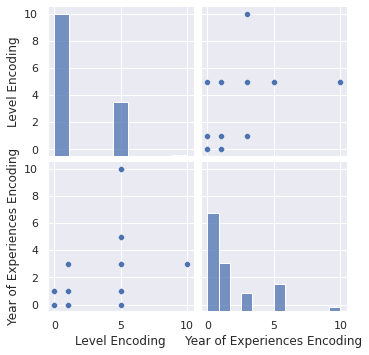

In [51]:
sns.pairplot(df.dropna(subset=['Level Encoding'])[['Level Encoding','Year of Experiences Encoding']])